# Imports

In [30]:
%load_ext autoreload
from helper_mid import *
%autoreload
%aimport helper_mid

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
df = pd.read_csv('dataset_management\data\clean\clean.csv', parse_dates=['Timestamp'])
datam=load_data(df)
data_m=split(datam)
data_m=data_m[144:-284]
data_m.isna().sum()

c:\Users\Giannis\Desktop\aba\project\EPF_ABA23\helper.py:287: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df0=df0.append(dn[j][i], ignore_index=True)
c:\Users\Giannis\Desktop\aba\project\EPF_ABA23\helper.py:287: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df0=df0.append(dn[j][i], ignore_index=True)
c:\Users\Giannis\Desktop\aba\project\EPF_ABA23\helper.py:287: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df0=df0.append(dn[j][i], ignore_index=True)
c:\Users\Giannis\Desktop\aba\project\EPF_ABA23\helper.py:287: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df0=df0.append(dn[j][i], ignore_index=True)
c:\Users\Giannis\Desktop\aba\project

Timestamp                 0
Day_Ahead_price           0
ttf_price                 0
coal_price                0
co2_price                 0
Hour                      0
Date                      0
Weekday                   0
business                  0
DK_1_imports_mean4        0
SE_4_imports_mean4        0
DK_1_exports_mean4        0
SE_4_exports_mean4        0
Actual_Load_mean4         0
Solar_[MW]_mean4          0
DE_LU_AT_imports_mean4    0
DE_LU_AT_exports_mean4    0
Wind Total_mean4          0
dtype: int64

# Data-transformation for mid term

In [3]:
# setting up features and target
cols_std = ['ttf_price', 'coal_price', 'co2_price','DK_1_imports_mean4',
       'SE_4_imports_mean4', 'DK_1_exports_mean4', 'SE_4_exports_mean4',
       'Actual_Load_mean4', 'Solar_[MW]_mean4', 'DE_LU_AT_imports_mean4',
       'DE_LU_AT_exports_mean4', 'Wind Total_mean4'] 
features = cols_std + ['Weekday', 'Hour']
target = 'Day_Ahead_price'

In [4]:
# setting up splits
train_start = pd.to_datetime(['2018-01-09', '2021-01-01', '2021-08-01'], format = '%Y-%m-%d')
k_folds = len(train_start)


df_lagged=data_m.copy()
df_lagged

,Timestamp,Day_Ahead_price,ttf_price,coal_price,co2_price,Hour,Date,Weekday,business,DK_1_imports_mean4,SE_4_imports_mean4,DK_1_exports_mean4,SE_4_exports_mean4,Actual_Load_mean4,Solar_[MW]_mean4,DE_LU_AT_imports_mean4,DE_LU_AT_exports_mean4,Wind Total_mean4
144,2018-01-09 00:00:00,27.17,19.434999,107.00,8.19,0,2018-01-09,1,True,383.00,0.00,0.0,808.0,1245.00,0.00,600.00,0.00,429.00
145,2018-01-09 01:00:00,22.10,19.434999,107.00,8.19,1,2018-01-09,1,True,589.00,0.00,0.0,1019.0,1203.00,0.00,600.00,0.00,375.00
146,2018-01-09 02:00:00,9.79,19.434999,107.00,8.19,2,2018-01-09,1,True,557.00,0.00,0.0,926.0,1178.00,0.00,600.00,0.00,313.00
147,2018-01-09 03:00:00,4.99,19.434999,107.00,8.19,3,2018-01-09,1,True,487.00,0.00,0.0,784.0,1180.00,0.00,600.00,0.00,229.00
148,2018-01-09 04:00:00,9.24,19.434999,107.00,8.19,4,2018-01-09,1,True,580.00,0.00,0.0,756.0,1247.00,0.00,600.00,0.00,175.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2023-04-15 16:00:00,45.79,41.148998,194.15,79.40,16,2023-04-15,5,False,43.75,767.00,297.5,184.5,1527.75,151.75,505.00,2023.75,676.50
39713,2023-04-15 17:00:00,51.78,41.148998,194.15,79.40,17,2023-04-15,5,False,0.00,823.75,390.5,0.0,1592.25,64.50,411.75,1700.75,631.75
39714,2023-04-15 18:00:00,54.53,41.148998,194.15,79.40,18,2023-04-15,5,False,0.00,1017.25,346.0,0.0,1625.00,10.00,6.00,1821.00,583.00
39715,2023-04-15 19:00:00,52.31,41.148998,194.15,79.40,19,2023-04-15,5,False,0.00,1121.75,356.0,0.0,1571.00,0.25,0.00,2213.00,549.00


# Models

## Split - Method = 0
The approach is to train and test in consecutive/sequential blocks, devoting 85% to training and 15% to test.

In [5]:
split_method = 0
df_lagged



,Timestamp,Day_Ahead_price,ttf_price,coal_price,co2_price,Hour,Date,Weekday,business,DK_1_imports_mean4,SE_4_imports_mean4,DK_1_exports_mean4,SE_4_exports_mean4,Actual_Load_mean4,Solar_[MW]_mean4,DE_LU_AT_imports_mean4,DE_LU_AT_exports_mean4,Wind Total_mean4
144,2018-01-09 00:00:00,27.17,19.434999,107.00,8.19,0,2018-01-09,1,True,383.00,0.00,0.0,808.0,1245.00,0.00,600.00,0.00,429.00
145,2018-01-09 01:00:00,22.10,19.434999,107.00,8.19,1,2018-01-09,1,True,589.00,0.00,0.0,1019.0,1203.00,0.00,600.00,0.00,375.00
146,2018-01-09 02:00:00,9.79,19.434999,107.00,8.19,2,2018-01-09,1,True,557.00,0.00,0.0,926.0,1178.00,0.00,600.00,0.00,313.00
147,2018-01-09 03:00:00,4.99,19.434999,107.00,8.19,3,2018-01-09,1,True,487.00,0.00,0.0,784.0,1180.00,0.00,600.00,0.00,229.00
148,2018-01-09 04:00:00,9.24,19.434999,107.00,8.19,4,2018-01-09,1,True,580.00,0.00,0.0,756.0,1247.00,0.00,600.00,0.00,175.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2023-04-15 16:00:00,45.79,41.148998,194.15,79.40,16,2023-04-15,5,False,43.75,767.00,297.5,184.5,1527.75,151.75,505.00,2023.75,676.50
39713,2023-04-15 17:00:00,51.78,41.148998,194.15,79.40,17,2023-04-15,5,False,0.00,823.75,390.5,0.0,1592.25,64.50,411.75,1700.75,631.75
39714,2023-04-15 18:00:00,54.53,41.148998,194.15,79.40,18,2023-04-15,5,False,0.00,1017.25,346.0,0.0,1625.00,10.00,6.00,1821.00,583.00
39715,2023-04-15 19:00:00,52.31,41.148998,194.15,79.40,19,2023-04-15,5,False,0.00,1121.75,356.0,0.0,1571.00,0.25,0.00,2213.00,549.00


### Baseline

Iteration  0
train 2018-01-09 00:00:00 - 2020-07-21 23:00:00, test 2020-07-22 00:00:00 - 2020-12-31 23:00:00


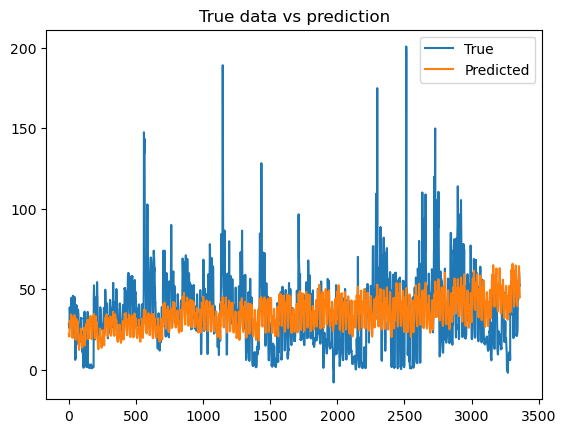

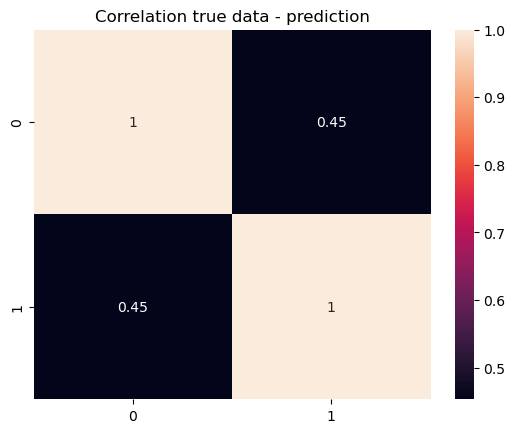

	r^2=0.204786
Mean Absolute Error (MAE): 14.800410381305277
Mean Squared Error (MSE): 382.6830398439949
Root Mean Squared Error (RMSE): 19.56228616097809
Mean Absolute Percentage Error (MAPE): 228.42
Accuracy: -128.42
Iteration  1
train 2021-01-01 00:00:00 - 2021-06-29 23:00:00, test 2021-06-30 00:00:00 - 2021-07-31 23:00:00


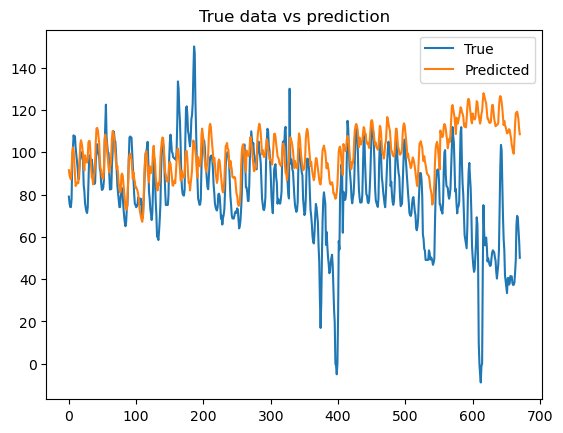

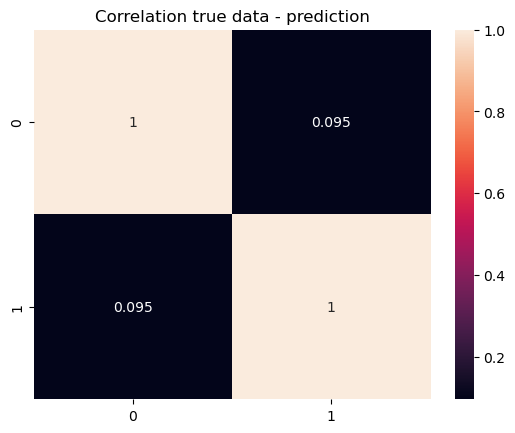

	r^2=-0.903293
Mean Absolute Error (MAE): 22.403308485114444
Mean Squared Error (MSE): 935.3936197901422
Root Mean Squared Error (RMSE): 30.58420539739658
Mean Absolute Percentage Error (MAPE): 1893.37
Accuracy: -1793.37
Iteration  2
train 2021-08-01 00:00:00 - 2023-01-12 23:00:00, test 2023-01-13 00:00:00 - 2023-04-15 23:00:00


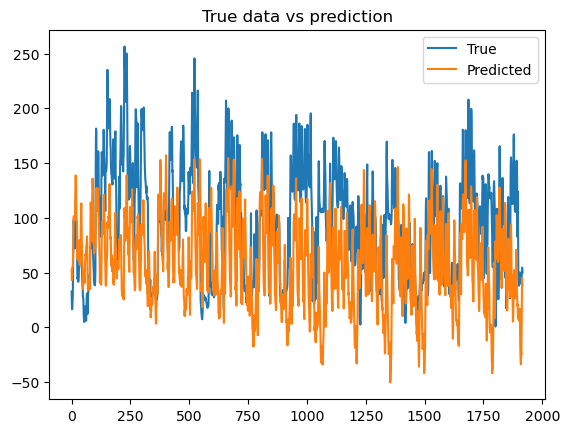

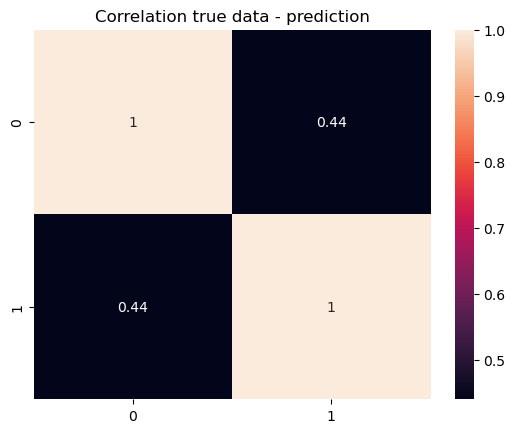

	r^2=-0.511270
Mean Absolute Error (MAE): 49.58399879765058
Mean Squared Error (MSE): 3711.726922109453
Root Mean Squared Error (RMSE): 60.92394375046196
Mean Absolute Percentage Error (MAPE): 76.86
Accuracy: 23.14


In [6]:
lr_pred_0, lr_model_0 = run_model('lr', df_lagged, k_folds, split_method,
                                         train_start, features, target, cols_std)

In [7]:
lr_model_0

[{'copy_X': True,
  'fit_intercept': True,
  'n_jobs': None,
  'normalize': 'deprecated',
  'positive': False},
 {'copy_X': True,
  'fit_intercept': True,
  'n_jobs': None,
  'normalize': 'deprecated',
  'positive': False},
 {'copy_X': True,
  'fit_intercept': True,
  'n_jobs': None,
  'normalize': 'deprecated',
  'positive': False}]

### Moving average

In [8]:
df_ma_0 = run_model('ma', df_lagged, k_folds, split_method,
                                         train_start, features, target, cols_std, pred_window = 24*1)

df_ma_0.dropna(how = 'any', axis = 0, inplace = True)
df_ma_0.drop(df_ma_0[df_ma_0[target] == 0].index, inplace = True)

TypeError: run_model() got an unexpected keyword argument 'pred_window'

In [ ]:
ytrue = np.array(df_ma_0[target]).ravel()
ypred = np.array(df_ma_0['pred']).ravel()

NameError: name 'df_ma_0' is not defined

In [ ]:
model_evaluation(ytrue, ypred)

### Random Forest

Iteration  0
train 2018-01-09 00:00:00 - 2020-12-01 23:00:00, test 2020-12-02 00:00:00 - 2020-12-31 23:00:00


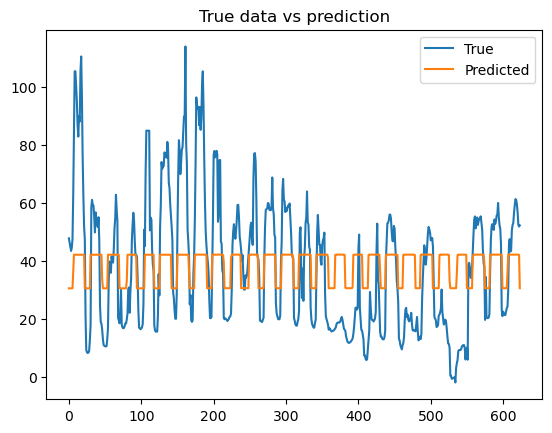

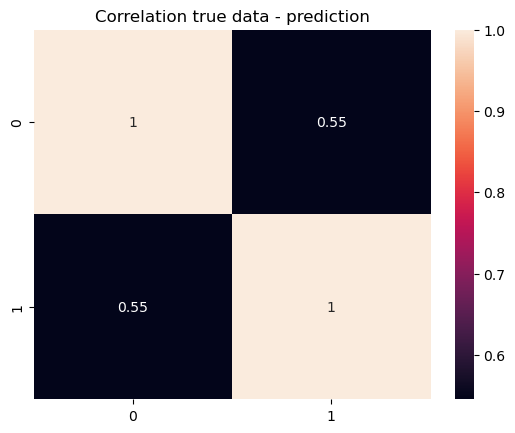

	r^2=0.202312
Mean Absolute Error (MAE): 16.78817244571623
Mean Squared Error (MSE): 424.403560311406
Root Mean Squared Error (RMSE): 20.601057261980657
Mean Absolute Percentage Error (MAPE): 168.02
Accuracy: -68.02
Iteration  1
train 2018-01-09 00:00:00 - 2021-07-01 23:00:00, test 2021-07-02 00:00:00 - 2021-07-31 23:00:00


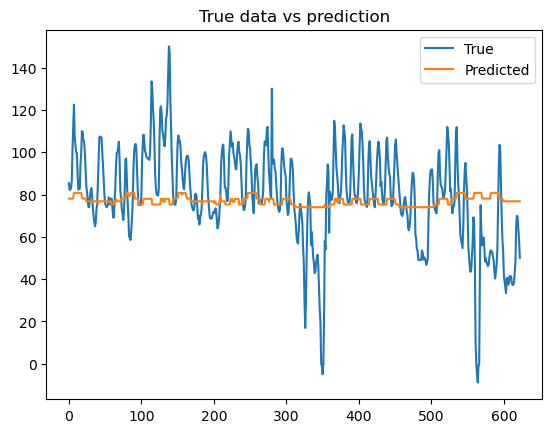

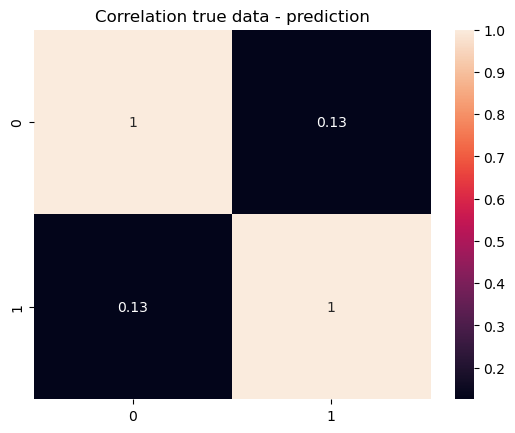

	r^2=0.000144
Mean Absolute Error (MAE): 16.93197635633668
Mean Squared Error (MSE): 511.7384274829417
Root Mean Squared Error (RMSE): 22.62163626891171
Mean Absolute Percentage Error (MAPE): 1689.82
Accuracy: -1589.82
Iteration  2
train 2018-01-09 00:00:00 - 2023-03-16 23:00:00, test 2023-03-17 00:00:00 - 2023-04-15 23:00:00


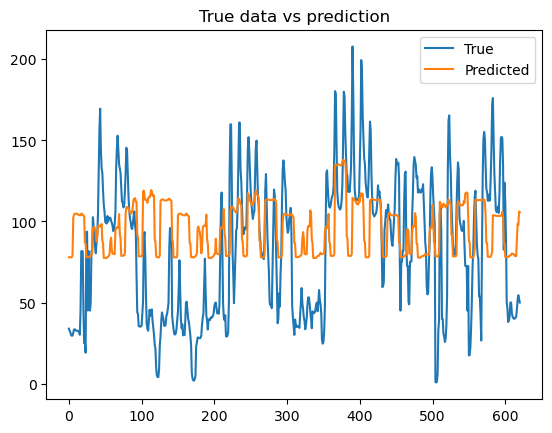

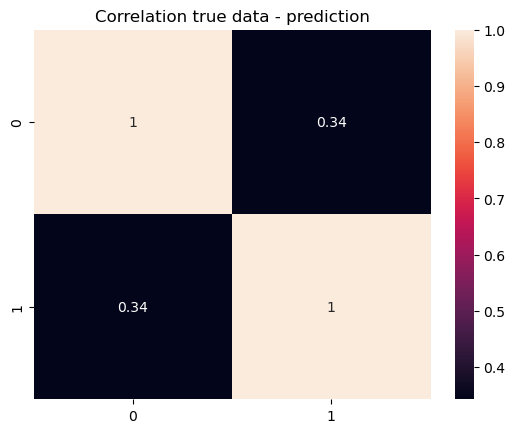

	r^2=0.027069
Mean Absolute Error (MAE): 35.15424702010664
Mean Squared Error (MSE): 1741.517642928767
Root Mean Squared Error (RMSE): 41.731494616521545
Mean Absolute Percentage Error (MAPE): 144.0
Accuracy: -44.0


In [31]:
rf_pred_0, rf_models_0 = run_model('rf', df_lagged, k_folds, split_method, train_start, features, target, cols_std)

### XGBoost

In [22]:
xgb_pred_0, xgb_models_0 = run_model('xgb', df_lagged, k_folds, split_method, train_start, features, target, cols_std,'long term')

Iteration  0
train 2018-01-09 00:00:00 - 2020-12-01 23:00:00, test 2020-12-02 00:00:00 - 2020-12-31 23:00:00


ValueError: feature_names must be string, and may not contain [, ] or <

## Split - Method = 1
The approach is to split the data in increasing blocks. The size of the train set increases, whereas the size of the test remains 3 months.

In [16]:
split_method = 1

Iteration  0
train 2018-01-09 00:00:00 - 2020-12-01 23:00:00, test 2020-12-02 00:00:00 - 2020-12-31 23:00:00


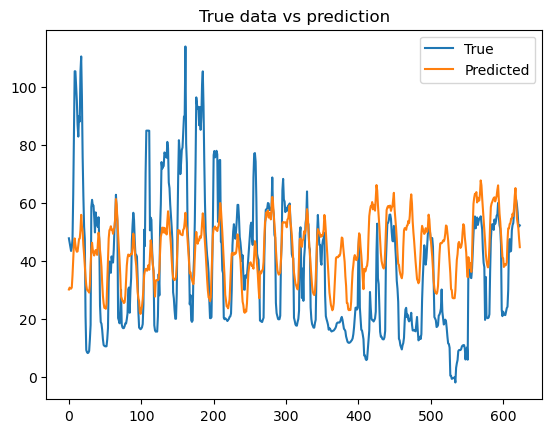

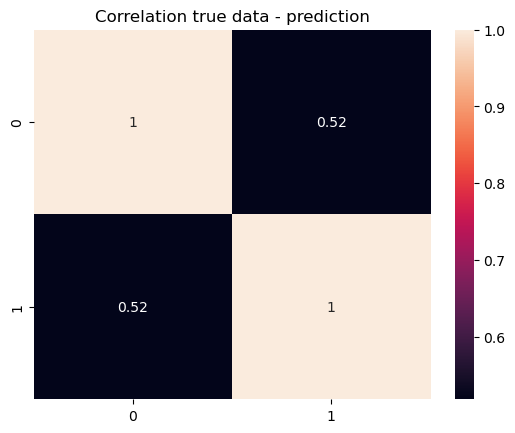

	r^2=0.205084
Mean Absolute Error (MAE): 16.52241190844902
Mean Squared Error (MSE): 422.9290097332413
Root Mean Squared Error (RMSE): 20.565237896344435
Mean Absolute Percentage Error (MAPE): 169.14
Accuracy: -69.14
Iteration  1
train 2018-01-09 00:00:00 - 2021-07-01 23:00:00, test 2021-07-02 00:00:00 - 2021-07-31 23:00:00


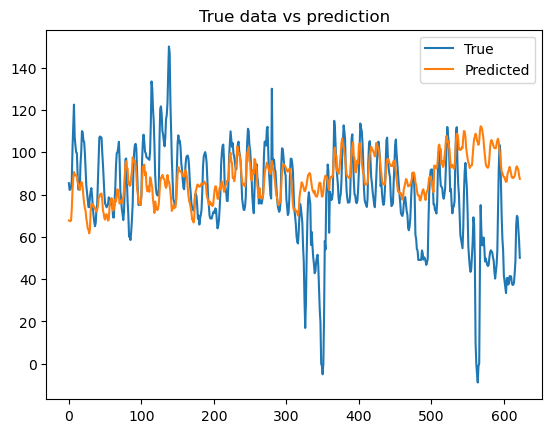

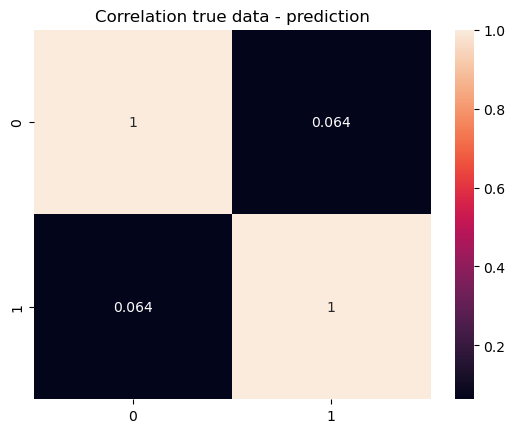

	r^2=-0.258808
Mean Absolute Error (MAE): 17.860673859093794
Mean Squared Error (MSE): 644.2733288432345
Root Mean Squared Error (RMSE): 25.38253984224657
Mean Absolute Percentage Error (MAPE): 1938.08
Accuracy: -1838.08
Iteration  2
train 2018-01-09 00:00:00 - 2023-03-16 23:00:00, test 2023-03-17 00:00:00 - 2023-04-15 23:00:00


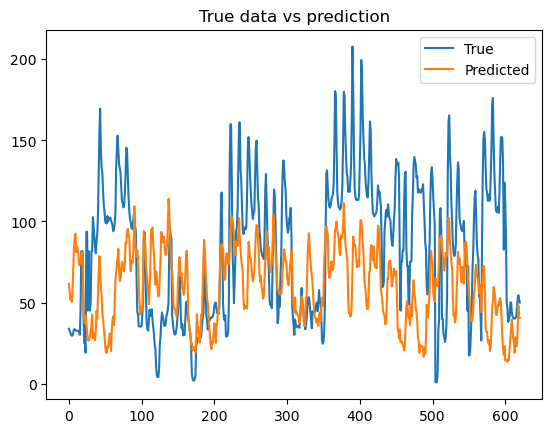

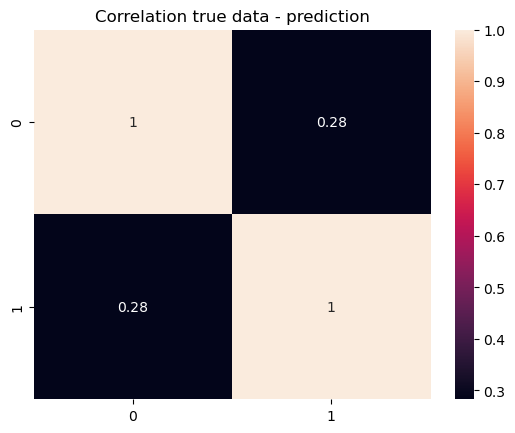

	r^2=-0.269821
Mean Absolute Error (MAE): 39.17621534275632
Mean Squared Error (MSE): 2272.941235761344
Root Mean Squared Error (RMSE): 47.675373472699135
Mean Absolute Percentage Error (MAPE): 97.16
Accuracy: 2.84


In [13]:
lr_pred_1, lr_model_1 = run_model('lr', df_lagged, k_folds, split_method,
                                         train_start, features, target, cols_std)

Iteration  0
train 2018-01-09 00:00:00 - 2020-12-01 23:00:00, test 2020-12-02 00:00:00 - 2020-12-31 23:00:00


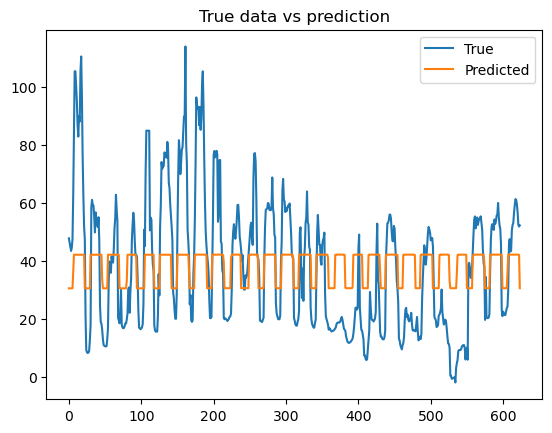

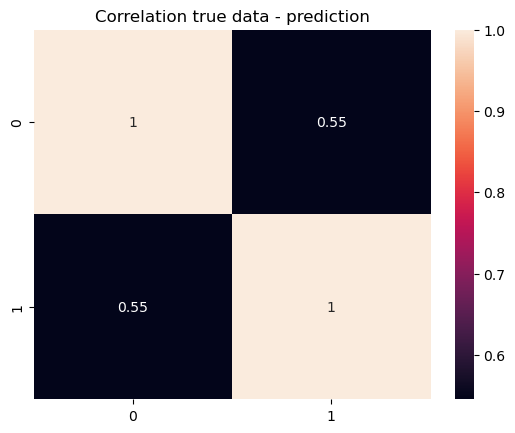

	r^2=0.202312
Mean Absolute Error (MAE): 16.78817244571623
Mean Squared Error (MSE): 424.403560311406
Root Mean Squared Error (RMSE): 20.601057261980657
Mean Absolute Percentage Error (MAPE): 168.02
Accuracy: -68.02
Iteration  1
train 2018-01-09 00:00:00 - 2021-07-01 23:00:00, test 2021-07-02 00:00:00 - 2021-07-31 23:00:00


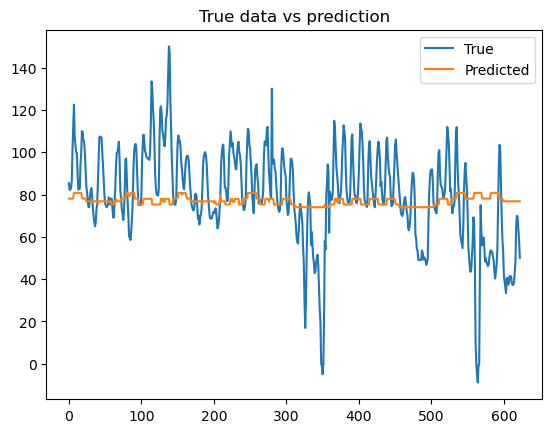

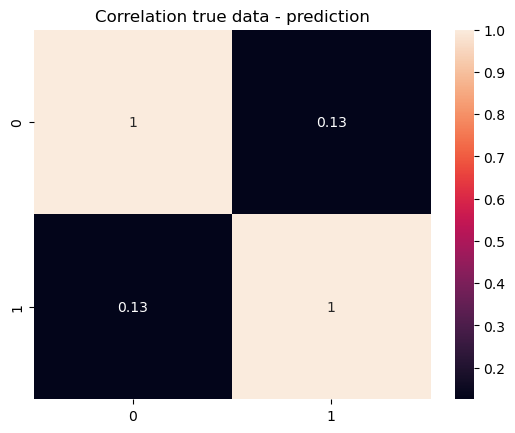

	r^2=0.000144
Mean Absolute Error (MAE): 16.93197635633668
Mean Squared Error (MSE): 511.7384274829417
Root Mean Squared Error (RMSE): 22.62163626891171
Mean Absolute Percentage Error (MAPE): 1689.82
Accuracy: -1589.82
Iteration  2
train 2018-01-09 00:00:00 - 2023-03-16 23:00:00, test 2023-03-17 00:00:00 - 2023-04-15 23:00:00


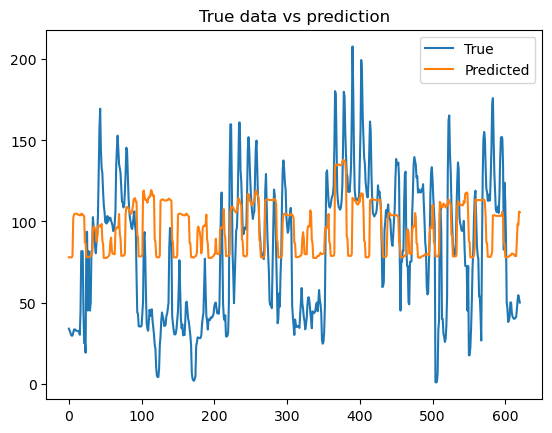

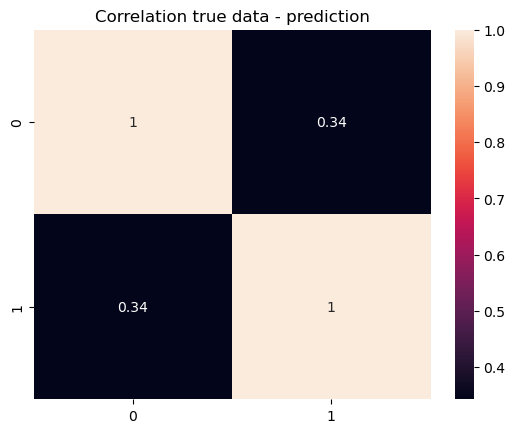

	r^2=0.027060
Mean Absolute Error (MAE): 35.154494180879226
Mean Squared Error (MSE): 1741.5338329254685
Root Mean Squared Error (RMSE): 41.73168859422619
Mean Absolute Percentage Error (MAPE): 144.0
Accuracy: -44.0


In [24]:
rf_pred_1, rf_models_1 = run_model('rf', df_lagged, k_folds, split_method, train_start, features, target, cols_std,X_std=False)

Iteration  0
train 2018-01-09 00:00:00 - 2020-12-01 23:00:00, test 2020-12-02 00:00:00 - 2020-12-31 23:00:00


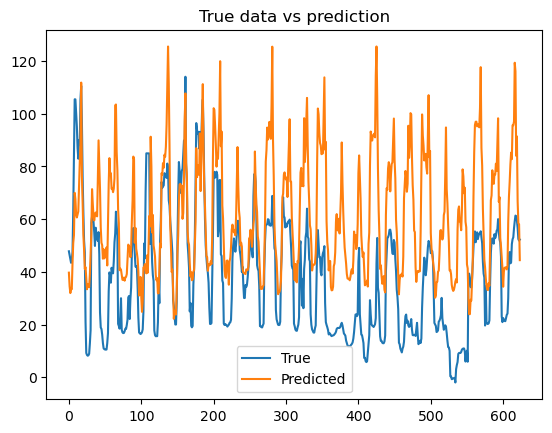

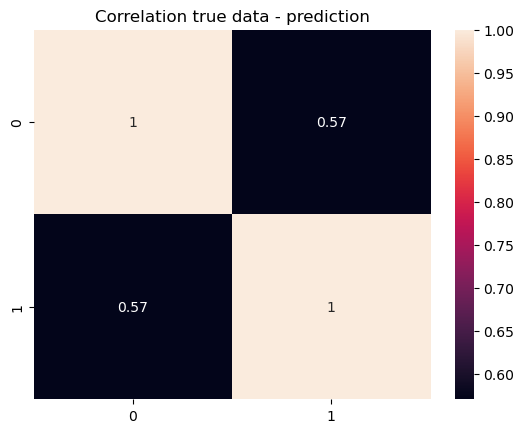

	r^2=-0.779168
Mean Absolute Error (MAE): 25.72464485474122
Mean Squared Error (MSE): 946.5924359395527
Root Mean Squared Error (RMSE): 30.76674236801083
Mean Absolute Percentage Error (MAPE): 229.99
Accuracy: -129.99
Iteration  1
train 2018-01-09 00:00:00 - 2021-07-01 23:00:00, test 2021-07-02 00:00:00 - 2021-07-31 23:00:00


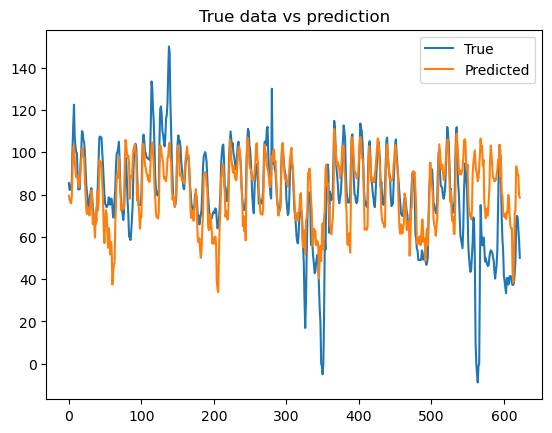

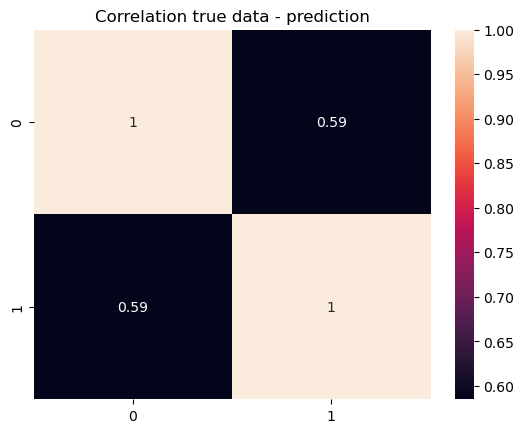

	r^2=0.323039
Mean Absolute Error (MAE): 12.927689907998564
Mean Squared Error (MSE): 346.4770121309075
Root Mean Squared Error (RMSE): 18.613892986984414
Mean Absolute Percentage Error (MAPE): 1369.58
Accuracy: -1269.58
Iteration  2
train 2018-01-09 00:00:00 - 2023-03-16 23:00:00, test 2023-03-17 00:00:00 - 2023-04-15 23:00:00


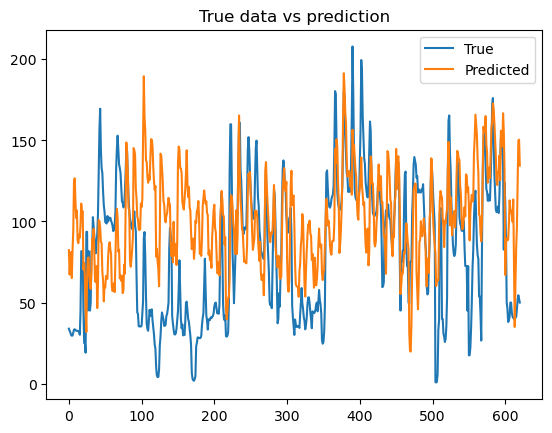

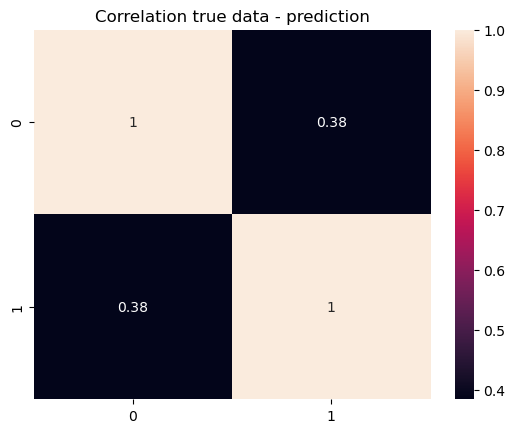

	r^2=-0.119382
Mean Absolute Error (MAE): 36.39553975607462
Mean Squared Error (MSE): 2003.6598993340392
Root Mean Squared Error (RMSE): 44.762259765722725
Mean Absolute Percentage Error (MAPE): 143.45
Accuracy: -43.45


In [29]:
xgb_pred_1, xgb_models_1 = run_model('xgb', df_lagged, k_folds, split_method, train_start, features, target, cols_std,X_std=False)

#### NOTES FRANCISCO/FREDERIK 14/04<br>
correlation between ytrue and ypred, RMSE can be hard to refrence.<br>
use power transform instead of log (how?)

# Long term

In [5]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.linear_model import Ridge


r=df.copy()
r = r.set_index('Timestamp')

def build_far(x_train, y_train, x_test,steps): # same split as short term
    model_ = ForecasterAutoreg(regressor = Ridge(),lags = 336)
    model_.fit(y=y_train,exog=x_train)
    ypred = model_.predict(steps = steps,exog = x_test)
# Add datetime index to predictions
    #ypred = pd.Series(data=ypred, index=x_test.index)
    return ypred, model_